Exploratory Data Analysis

Roles to explore

In [2]:

import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#loading dataset
dataset=load_dataset('lukebarousse/data_jobs')
#forming a dataframe
df = dataset['train'].to_pandas()


#data cleanup converting date column to date timetype from string type.
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list)


In [7]:
import seaborn as sns

In [3]:
df_DA_US= df[(df['job_title_short'] == 'Data Analyst') &( df['job_country']== 'United States')].copy()

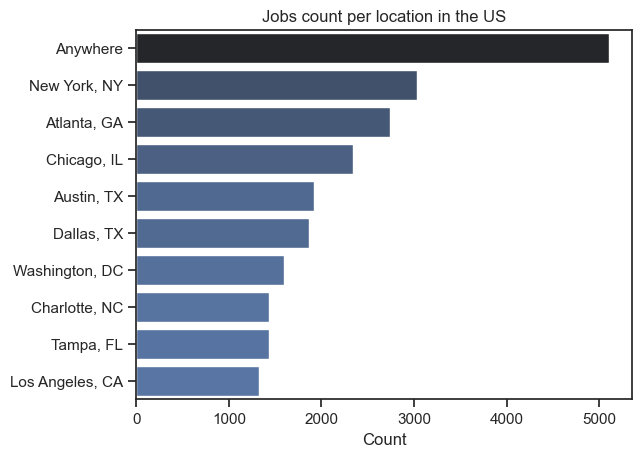

In [12]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
plt.title('Jobs count per location in the US')
plt.ylabel('')
plt.xlabel('Count')
plt.show()

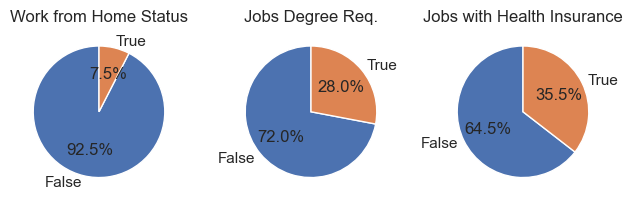

In [14]:
col_options = {
                'job_work_from_home':'Work from Home Status',
                'job_no_degree_mention':'Jobs Degree Req.',
                'job_health_insurance':'Jobs with Health Insurance'
}
fig,ax=plt.subplots(1,3)
for i, (column, title) in enumerate(col_options.items()):
    ax[i].pie(df_DA_US[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)
    
fig.tight_layout()
plt.show()

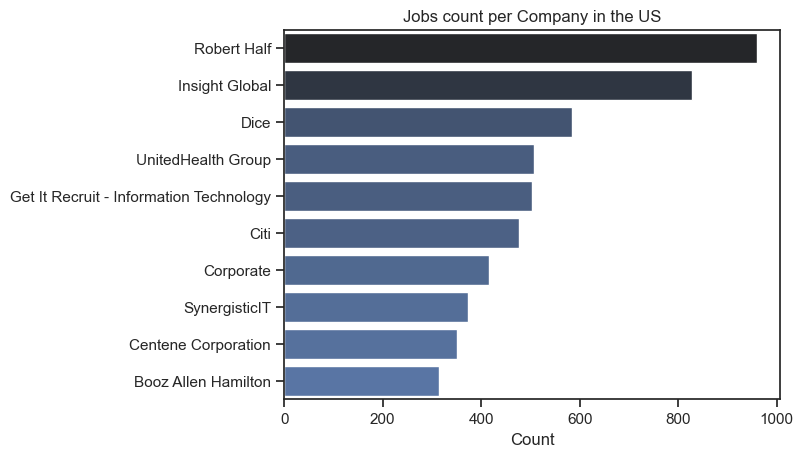

In [15]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
plt.title('Jobs count per Company in the US')
plt.ylabel('')
plt.xlabel('Count')
plt.show()